# College Major Analysis based on economical factors

## The goal of the analysis is to provide a data model that can help students and parents choose a college major and understand how big a financial difference it makes.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
def load_data(filename):
    """Given a filename of a csv load data into a Pandas dataframe.

        filename - string

        return Pandas dataframe
    """
    return pd.read_csv(filename, encoding='utf-8')

**The dataset files used for this analysis are:**
1. all-ages.csv
2. majors-list.csv
3. women-stem.csv
4. recent-grads.csv
5. grad-students.csv

## DataSet Information
**Some columns used in the dataset are:**

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.


In [3]:
all_ages = 'all-ages.csv'
grad_students = 'grad-students.csv'
majors_list = 'majors-list.csv'
women_stem = 'women-stem.csv'
recent_grads = 'recent-grads.csv'

In [4]:
all_ages_df = load_data(all_ages)
recent_grads_df = load_data(recent_grads)
grad_students_df = load_data(grad_students)
majors_list_df = load_data(majors_list)
women_stem_df = load_data(women_stem)

## Data Cleaning (Removing records with missing values)

In [5]:
def remove_missing_values(df, df_name):
    original_data_len = len(df)
    print("Before removing the missing data and null values, the dataset '{}' has {} number of records".format(df_name, original_data_len))
    
    #drop records with missing values
    df.dropna(inplace = True)
    
    #Now again let's check the no. of records we have
    cleaned_data_len = len(df)
    print("After removing the missing data and null values, the dataset '{}' has {} number of records\n".format(df_name, cleaned_data_len))

In [6]:
remove_missing_values(all_ages_df, all_ages)
remove_missing_values(recent_grads_df, recent_grads)
remove_missing_values(grad_students_df, grad_students)
remove_missing_values(majors_list_df, majors_list)
remove_missing_values(women_stem_df, women_stem)

Before removing the missing data and null values, the dataset 'all-ages.csv' has 173 number of records
After removing the missing data and null values, the dataset 'all-ages.csv' has 173 number of records

Before removing the missing data and null values, the dataset 'recent-grads.csv' has 173 number of records
After removing the missing data and null values, the dataset 'recent-grads.csv' has 172 number of records

Before removing the missing data and null values, the dataset 'grad-students.csv' has 173 number of records
After removing the missing data and null values, the dataset 'grad-students.csv' has 173 number of records

Before removing the missing data and null values, the dataset 'majors-list.csv' has 174 number of records
After removing the missing data and null values, the dataset 'majors-list.csv' has 173 number of records

Before removing the missing data and null values, the dataset 'women-stem.csv' has 76 number of records
After removing the missing data and null values,

In [7]:
all_ages_df.head(10)

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources,79409,63043,51077,2070,0.031791,50000,35000,75000.0
6,1106,SOIL SCIENCE,Agriculture & Natural Resources,6586,4926,4042,264,0.050867,63000,39400,88000.0
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources,8549,6392,5074,261,0.039230,52000,35000,75000.0
8,1301,ENVIRONMENTAL SCIENCE,Biology & Life Science,106106,87602,65238,4736,0.051290,52000,38000,75000.0
9,1302,FORESTRY,Agriculture & Natural Resources,69447,48228,39613,2144,0.042563,58000,40500,80000.0


In [8]:
rows, cols = all_ages_df.shape

print("The number of rows:", rows)
print("The number of columns:", cols)

The number of rows: 173
The number of columns: 11


In [9]:
grad_students_df.head(10)

,Major_code,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,...,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
0,5601,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,...,86062,73607,62435,3928,0.050661,65000.0,47000,98000.0,0.096320,0.153846
1,6004,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,...,461977,347166,250596,25484,0.068386,48000.0,34000,71000.0,0.104420,0.250000
2,6211,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,...,179335,145597,113579,7409,0.048423,50000.0,35000,75000.0,0.119837,0.300000
3,2201,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,...,37575,29738,23249,1661,0.052900,41600.0,29000,60000.0,0.125878,0.129808
4,2001,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,...,53819,43163,34231,3389,0.072800,52000.0,36000,78000.0,0.144753,0.096154
5,3201,COURT REPORTING,Law & Public Policy,1542,22,1008,860,0,0.000000,75000.0,...,8921,6967,6063,518,0.069205,50000.0,34000,75000.0,0.147376,0.500000
6,6206,MARKETING AND MARKETING RESEARCH,Business,190996,3738,151570,123045,8324,0.052059,80000.0,...,1029181,817906,662346,45519,0.052719,60000.0,40000,91500.0,0.156531,0.333333
7,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,17488,386,13104,11207,473,0.034838,67000.0,...,89169,71781,61335,1869,0.025377,55000.0,38000,80000.0,0.163965,0.218182
8,2101,COMPUTER PROGRAMMING AND DATA PROCESSING,Computers & Mathematics,5611,98,4716,3981,119,0.024612,85000.0,...,28314,22024,18381,2222,0.091644,60000.0,40000,85000.0,0.165394,0.416667
9,1904,ADVERTISING AND PUBLIC RELATIONS,Communications & Journalism,33928,688,28517,22523,899,0.030562,60000.0,...,163435,127832,100330,8706,0.063762,51000.0,37800,78000.0,0.171907,0.176471


In [10]:
recent_grads_df.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [11]:
majors_list_df.head(10)

,FOD1P,Major,Major_Category
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources
4,1104,FOOD SCIENCE,Agriculture & Natural Resources
5,1105,PLANT SCIENCE AND AGRONOMY,Agriculture & Natural Resources
6,1106,SOIL SCIENCE,Agriculture & Natural Resources
7,1199,MISCELLANEOUS AGRICULTURE,Agriculture & Natural Resources
8,1302,FORESTRY,Agriculture & Natural Resources
9,1303,NATURAL RESOURCES MANAGEMENT,Agriculture & Natural Resources


In [12]:
women_stem_df.head(10)

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
5,6,2405,CHEMICAL ENGINEERING,Engineering,32260,21239,11021,0.341631,65000
6,7,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,1792,832,960,0.535714,62000
7,8,2414,MECHANICAL ENGINEERING,Engineering,91227,80320,10907,0.119559,60000
8,9,2401,AEROSPACE ENGINEERING,Engineering,15058,12953,2105,0.139793,60000
9,10,2408,ELECTRICAL ENGINEERING,Engineering,81527,65511,16016,0.196450,60000


# Summary statistics:

**recent-grads.csv**

In [13]:
recent_grads_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


**majors-list.csv**

In [14]:
majors_list_df.describe()

,FOD1P,Major,Major_Category
count,173,173,173
unique,173,173,16
top,1100,GENERAL AGRICULTURE,Engineering
freq,1,1,29


**all-ages.csv**

In [15]:
all_ages_df.describe()

,Major_code,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
count,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,2.302566e+05,1.661620e+05,1.263078e+05,9725.034682,0.057355,56816.184971,38697.109827,82506.358382
std,1687.753140,4.220685e+05,3.073244e+05,2.424254e+05,18022.040192,0.019177,14706.226865,9414.524761,20805.330126
min,1100.000000,2.396000e+03,1.492000e+03,1.093000e+03,0.000000,0.000000,35000.000000,24900.000000,45800.000000
25%,2403.000000,2.428000e+04,1.728100e+04,1.272200e+04,1101.000000,0.046261,46000.000000,32000.000000,70000.000000
50%,3608.000000,7.579100e+04,5.656400e+04,3.961300e+04,3619.000000,0.054719,53000.000000,36000.000000,80000.000000
75%,5503.000000,2.057630e+05,1.428790e+05,1.110250e+05,8862.000000,0.069043,65000.000000,42000.000000,95000.000000
max,6403.000000,3.123510e+06,2.354398e+06,1.939384e+06,147261.000000,0.156147,125000.000000,78000.000000,210000.000000


**women-stem.csv**

In [16]:
women_stem_df.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Median
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,38.500000,3580.026316,25515.289474,12800.763158,12714.526316,0.436929,46118.421053
std,22.083176,1437.455038,43998.008553,21307.554101,29056.014723,0.232176,13187.223216
min,1.000000,1301.000000,609.000000,488.000000,77.000000,0.077453,26000.000000
25%,19.750000,2409.750000,3782.000000,2047.750000,1227.500000,0.247918,36150.000000
50%,38.500000,3601.500000,11047.500000,4583.000000,5217.500000,0.405868,44350.000000
75%,57.250000,5002.250000,27509.250000,11686.500000,12463.500000,0.591803,52250.000000
max,76.000000,6199.000000,280709.000000,111762.000000,187621.000000,0.967998,110000.000000


**grad-students.csv**

In [17]:
grad_students_df.describe()

,Major_code,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,Grad_P75,Nongrad_total,Nongrad_employed,Nongrad_full_time_year_round,Nongrad_unemployed,Nongrad_unemployment_rate,Nongrad_median,Nongrad_P25,Nongrad_P75,Grad_share,Grad_premium
count,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,1.730000e+02,1.730000e+02,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3879.815029,1.276720e+05,2250.872832,94037.034682,72861.184971,3506.427746,0.039343,76755.780347,52596.508671,112087.341040,2.147203e+05,1.545535e+05,1.207368e+05,8486.323699,0.053947,58583.815029,40078.179191,84332.947977,0.400595,0.328505
std,1687.753140,2.195512e+05,3805.923082,159723.860054,123153.615862,5909.871450,0.019076,16912.102488,10896.842595,30266.551533,3.996800e+05,2.900663e+05,2.335256e+05,16135.491564,0.019329,15028.468079,9509.017523,20861.431281,0.165964,0.185805
min,1100.000000,1.542000e+03,22.000000,1008.000000,770.000000,0.000000,0.000000,47000.000000,24500.000000,65000.000000,2.232000e+03,1.328000e+03,9.800000e+02,0.000000,0.000000,37000.000000,25000.000000,48000.000000,0.096320,-0.025000
25%,2403.000000,1.528400e+04,314.000000,12659.000000,9894.000000,453.000000,0.026068,65000.000000,45000.000000,93000.000000,2.056400e+04,1.591400e+04,1.175500e+04,880.000000,0.041981,48700.000000,34000.000000,72000.000000,0.267567,0.230769
50%,3608.000000,3.787200e+04,688.000000,28930.000000,22523.000000,1179.000000,0.036654,75000.000000,50000.000000,108000.000000,6.899300e+04,5.009200e+04,3.838400e+04,3157.000000,0.051031,55000.000000,38000.000000,80000.000000,0.398745,0.320755
75%,5503.000000,1.482550e+05,2528.000000,109944.000000,80794.000000,3329.000000,0.048051,90000.000000,60000.000000,130000.000000,1.849710e+05,1.291790e+05,1.036290e+05,7409.000000,0.064387,65000.000000,44000.000000,97000.000000,0.499117,0.400000
max,6403.000000,1.184158e+06,21994.000000,915341.000000,703347.000000,35718.000000,0.138515,135000.000000,85000.000000,294000.000000,2.996892e+06,2.253649e+06,1.882507e+06,136978.000000,0.160907,126000.000000,80000.000000,215000.000000,0.931175,1.647059


# Analysis and Visualization

**grad-students.csv**

In [18]:
# Plot Correlation matrix
def plot_CorrMatrix(df, csv_name):
    corr = df.corr()
    corr.style.background_gradient(cmap='coolwarm')
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()  # to make sure label appears at the bottom
    plt.title(f'Correlation Matrix for {csv_name}', fontsize=18)
    
    plt.show()

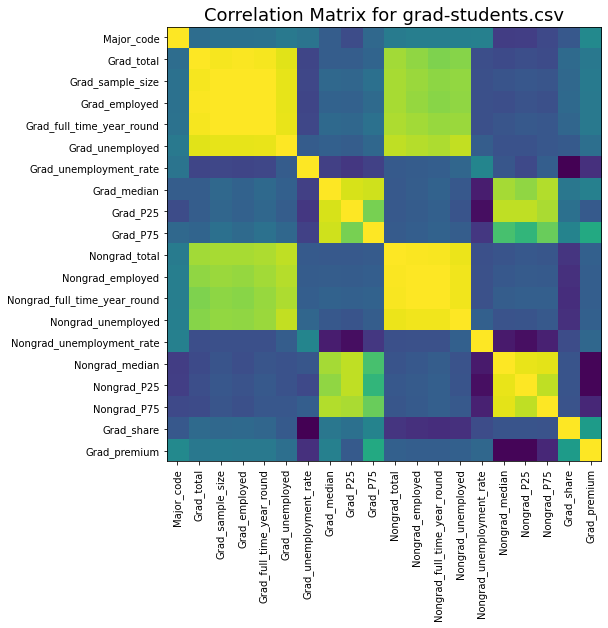

In [19]:
plot_CorrMatrix(grad_students_df, grad_students)

**recent-grads.csv**

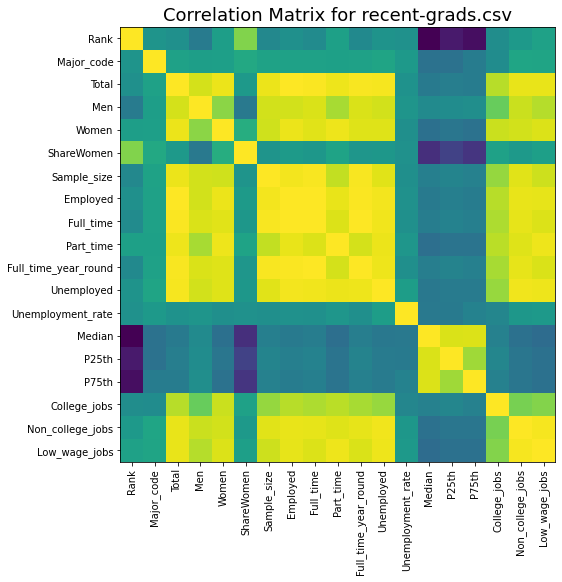

In [20]:
plot_CorrMatrix(recent_grads_df, recent_grads)

# Majors with median salary above $60,000

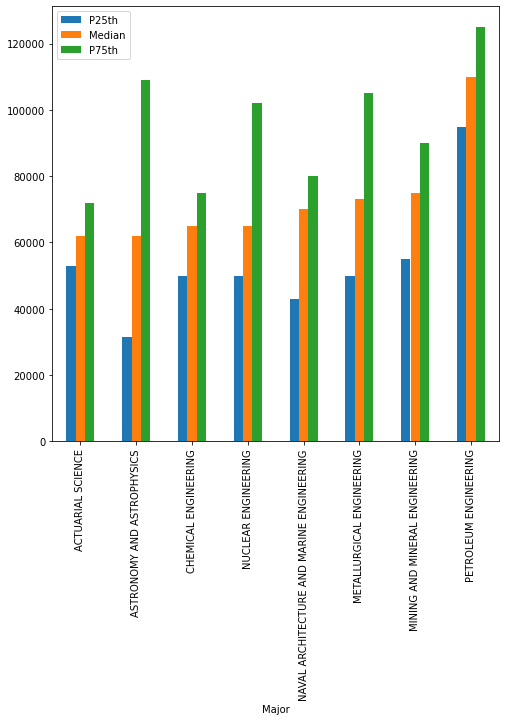

In [21]:
high_median_salary = recent_grads_df[recent_grads_df["Median"] > 60000].sort_values("Median")
high_median_salary.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar", figsize=(8,8))

plt.show()

### From the above bar chart, it is evident that the Petroleum Engineering major graduates got paid the highest out all other majors with a median salary of over $100,000. 

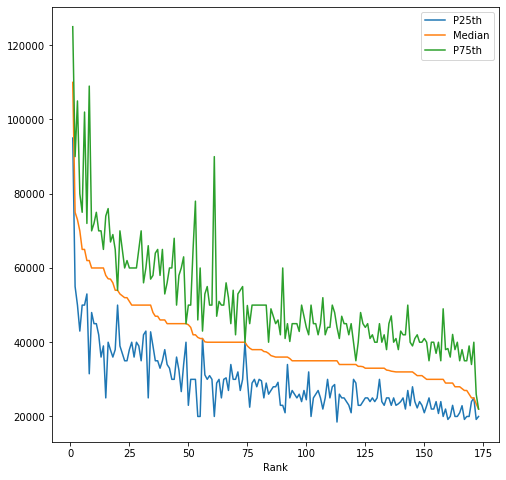

In [22]:
recent_grads_df.plot(x="Rank", y=["P25th", "Median", "P75th"], figsize=(8,8))
plt.show()

### From the above plot, we can make the following observations:
1. **Median income decreases as the rank decreases since the rank determines the median income**
2. **Some of the majors in the figure have large gaps between the 25th and 75th percentiles. This shows that graduates  with those degrees may earn notably lower or notably higher than the mdedian income.**
3. **All remaining majors have very small gaps between the 25th and 75th percentiles which means that the salary of the graduates with those degrees is very close to the median income.**

## Creating Scatter plots to analyze the relationships between different columns in the recent_grads dataset

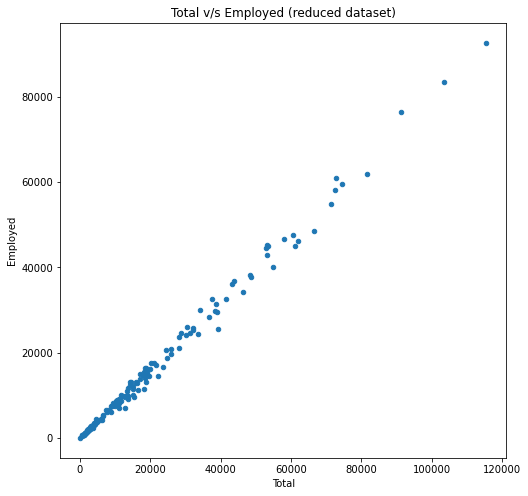

In [23]:
# Total v/ Employed

# to exclude the tail of the series from analysis
recent_grads_modified=recent_grads_df[recent_grads_df["Total"]< recent_grads_df["Total"].quantile(0.9)]

recent_grads_modified.plot(x='Total', y='Employed', kind='scatter', title="Total v/s Employed (reduced dataset)", figsize=(8,8))
plt.show()

### The above scatter plot between Total v/s Employed shows a strong positive correlation. However, we should not forget that correlation doesn't imply causation.

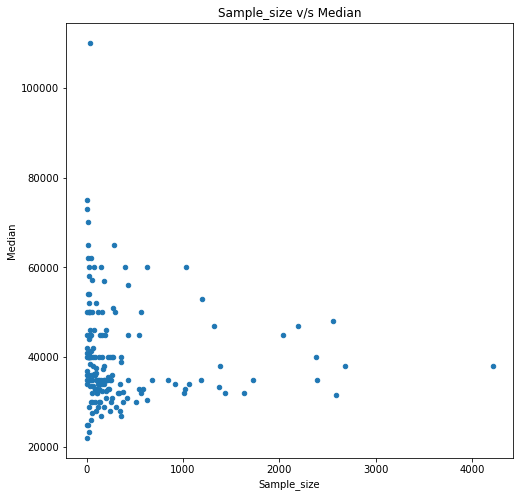

In [24]:
#Sample_size v/s Median

recent_grads_df.plot(x='Sample_size', y='Median', kind='scatter', title='Sample_size v/s Median', figsize=(8,8))
plt.show()

### From the above scatter plot, we can see that:
1. **Median salaries of the full time employees varies greatly in the lower tier of the sample size**
2. **We can't see any linear relation between the sample size and the median salary**

### Scatter plot with Median and ShareWomen

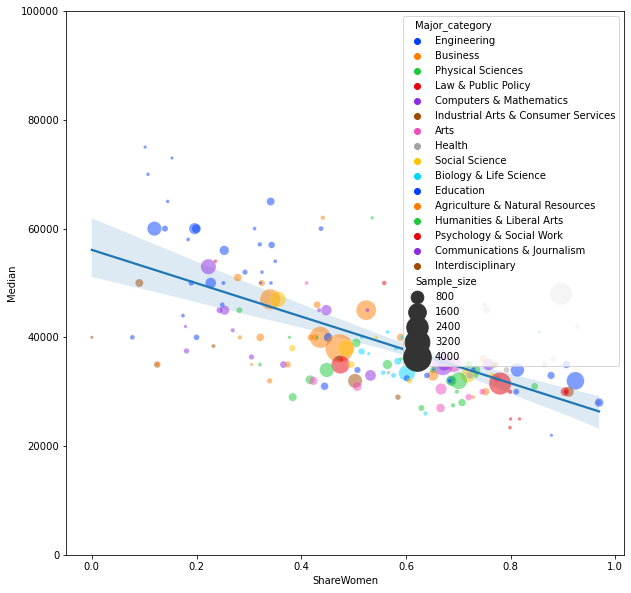

In [25]:
plt.figure(figsize=(10,10))
plt.ylim(0,100000)

sns.regplot(x='ShareWomen', y='Median', data=recent_grads_df, scatter=False)
sns.scatterplot(x='ShareWomen', y='Median', data=recent_grads_df, hue='Major_category',
                size='Sample_size', sizes=(10, 800), alpha=0.5, palette='bright')

plt.show()

### From the above Scatterplot, we can see the following observations:
* Slightly but surely we can see a negative correlation between Median and ShareWomen
* The health sector seems like a clear outlier as it has a high ShareWomen along with a high Median salary.
* Petroleum Engineering despite of a small sample size has the highest Median salary.

# Data Distribution

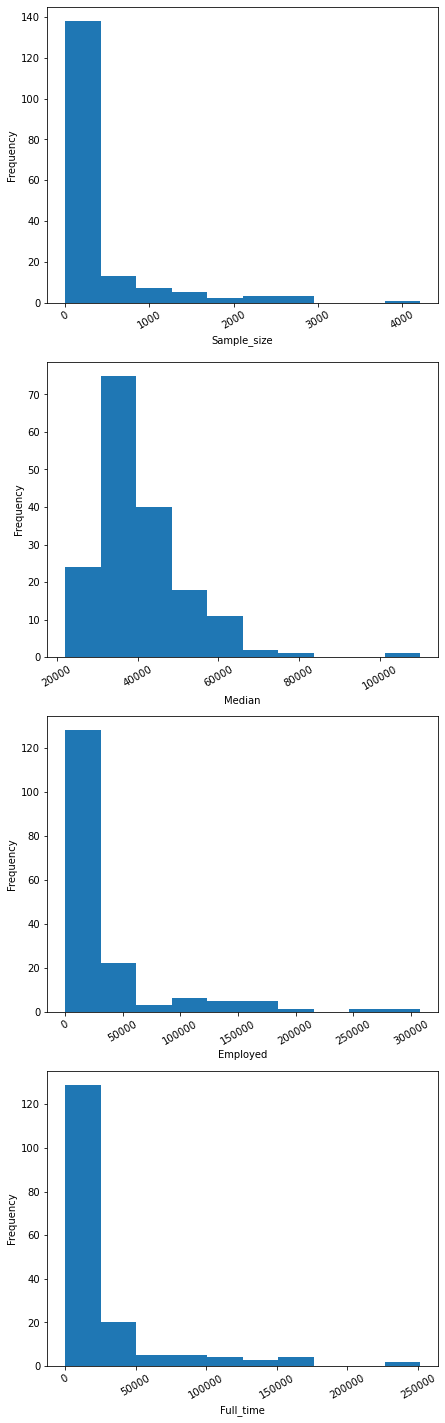

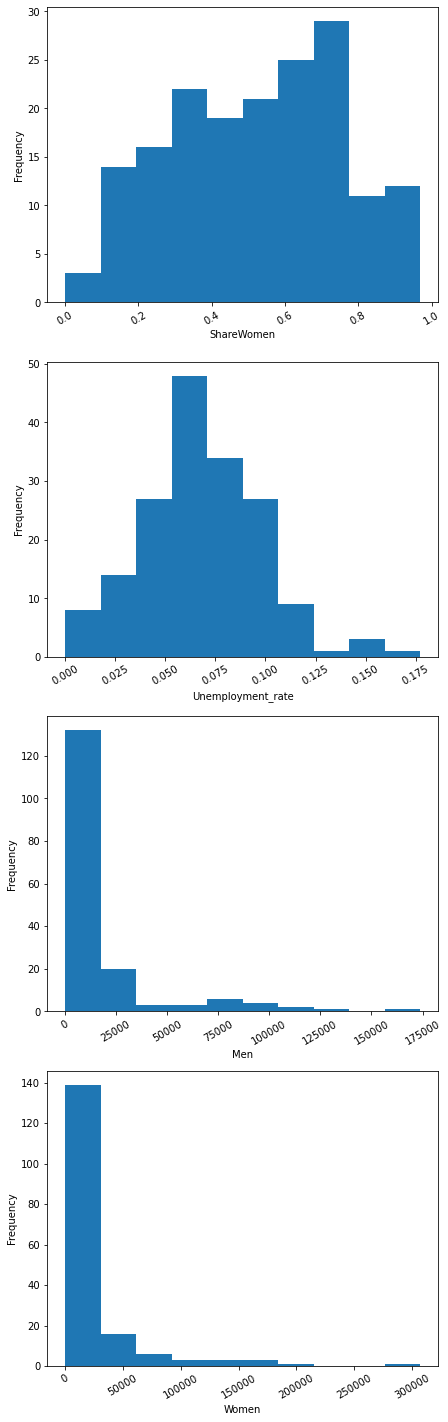

In [26]:
columns = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

figure = plt.figure(figsize=(7,25))
for i in range(0,4):
    ax = figure.add_subplot(4,1,i+1)
    ax.set_xlabel(columns[i])
    ax = recent_grads_df[columns[i]].plot(kind='hist', rot=30)
    
figure = plt.figure(figsize=(7,25))
for i in range(4,8):
    ax = figure.add_subplot(4,1,i-3)
    ax.set_xlabel(columns[i])
    ax = recent_grads_df[columns[i]].plot(kind='hist', rot=30)

### From the above histograms, we can conclude that:
1. **From the sample size histogram, it is clearly visible that the majority of the sample size of full-time workers is notably less than 500**
2. **From the Median salary histogram, we can see that the median salary range of recent graduates lies between \\$30,000- \\$40,000**
3. **From the employed column histogram, we can see that less than 50,000 graduate students were able to find some kind of employment** 
4. **From the Full_time histogram, we can see that number of full time employees is less than 25,000**
5. **From the ShareWomen histogram, we can see that share of the women in the total lies in the range of 0.2%-0.75%**
6. **We can see that the unemployment rate has never exceeded over 17.7% from the unemployment_rate histogram**
7. **The last 2 histograms which are number of men and number of women shows us that the number of men is notably similar to the number of women**

# Bar Plots

## Unemployment rate for top 10 ranking majors based on median salary

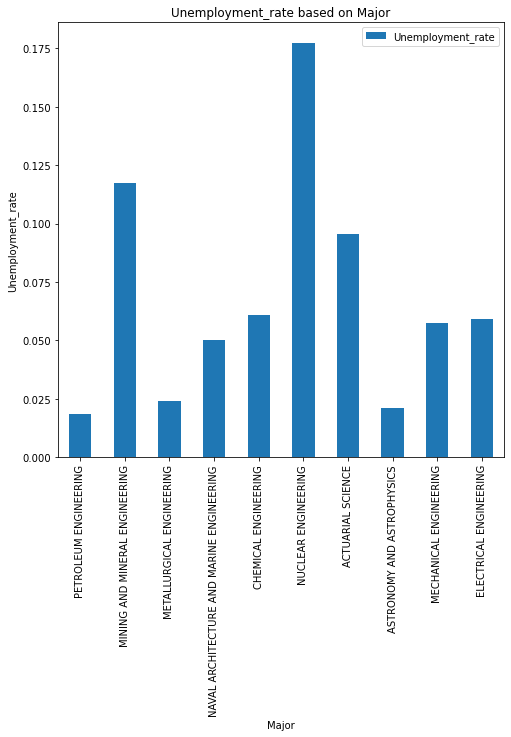

In [27]:
# slicing the list up to 10 will give us top 10 ranked majors
recent_grads_df[:10].plot.bar(x='Major', y='Unemployment_rate', figsize=(8,8))

plt.title("Unemployment_rate based on Major")
plt.ylabel("Unemployment_rate")

plt.show()

### From the above Bar plot, we can see that unemployment rate for the top 10 ranked majors is notably low. However, Nuclear Engineering looks like a slight outlier as it has a significantly higher unemployment rate compared to other top 10 ranked majors based on the median salary.

## Unemployment rate for the 10 least ranked majors based on median salary

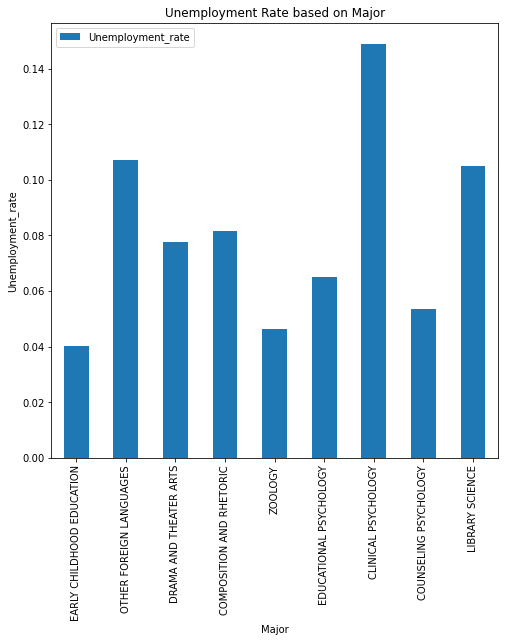

In [28]:
# slicing the list from 163 to the end since there are 173 total majors will give us least 10 ranked majors
recent_grads_df[163:].plot.bar(x='Major', y='Unemployment_rate', figsize=(8,8))

plt.title("Unemployment Rate based on Major")
plt.ylabel("Unemployment_rate")
plt.show()

### From the above Bar plot, we can also see that out of 10 least ranked majors, Clinical Psychology looks has the highest unemployment rate followed by Library Science and Other Foreign Languages.

## ShareWomen(women as share of total) for the top 10 ranked majors based on median salary

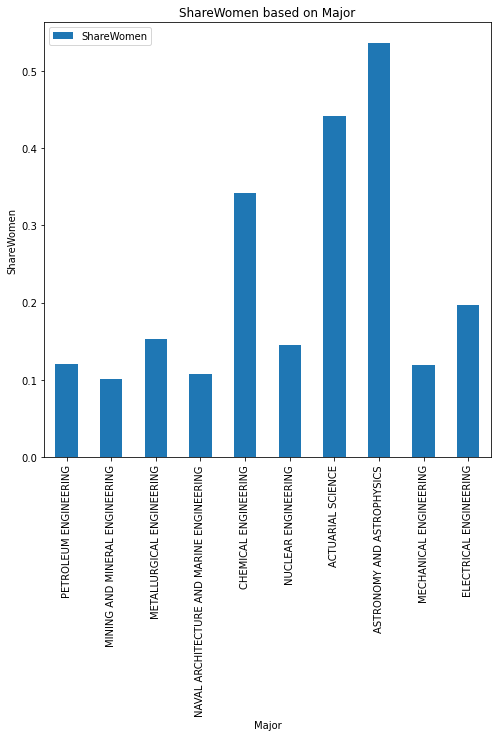

In [29]:
# slicing the list up to 10 will give us the top 10 ranked majors
recent_grads_df[:10].plot.bar(x='Major', y='ShareWomen', figsize=(8,8))

plt.title("ShareWomen based on Major")
plt.ylabel("ShareWomen")
plt.show()

### From the above Bar plot, we can see that the top 10 ranking Majors based on Median Salary are notably dominated by males. It is also evident that 7 out of the 10 top ranked Majors has less than 20% female graduates. Astronomy and Astrophysics has notably high womenshare out all other top 10 ranked majors.

## ShareWomen(women as share of total) for the 10 least ranked majors based on median salary

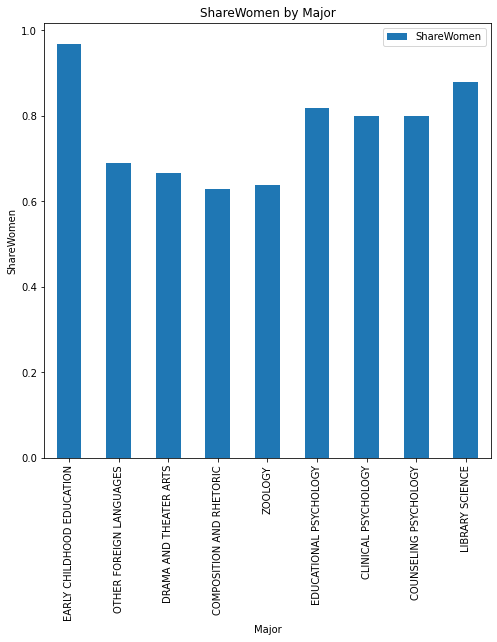

In [30]:
# slicing the list from 163 to the end since there are 173 total majors will give us least 10 ranked majors
recent_grads_df[163:].plot.bar(x='Major', y='ShareWomen', figsize=(8,8))

plt.title("ShareWomen by Major")
plt.ylabel("ShareWomen")
plt.show()

### From the above Bar plot, we can clearly see that the 10 least ranked Majors are dominated by Female graduates. There are more than 60% female graduates in the 10 least ranked majors based on the median salary.

# Top 10 Popular Majors

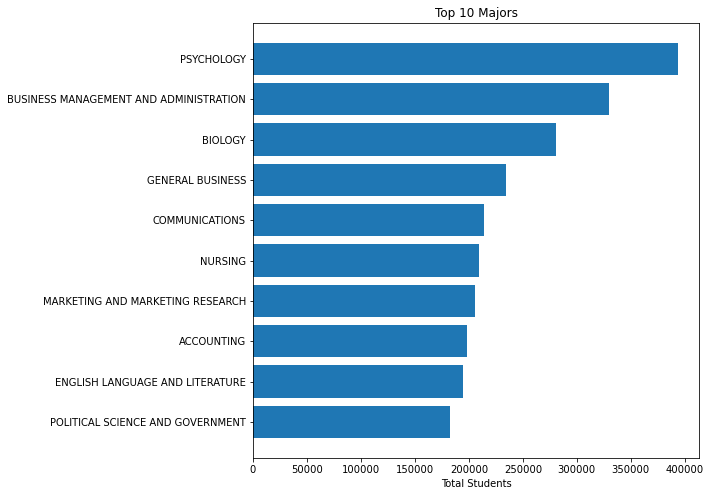

In [31]:
# ascending is set to False as we want top 10 
top_10_popular =recent_grads_df.sort_values(by="Total",axis=0,ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

# barh is used to to make a horizontal bar plot
ax.barh(top_10_popular["Major"][:10],top_10_popular["Total"][:10] )
# slicing all the list to 10 since we want top 10 majors
ax.set_yticks(top_10_popular["Major"][:10])
ax.set_yticklabels(top_10_popular["Major"][:10])
ax.invert_yaxis()  # to read the labels from top-to-bottom
ax.set_xlabel('Total Students')
ax.set_title('Top 10 Majors')

plt.show()

### Hence, from the above plot we can conclude that Psychology is the most popular major out of all other majors.  Political Science and Government is the last major on the top 10 popular majors as it barely made to the top 10 popular majors list.

# 10 Least Popular Majors

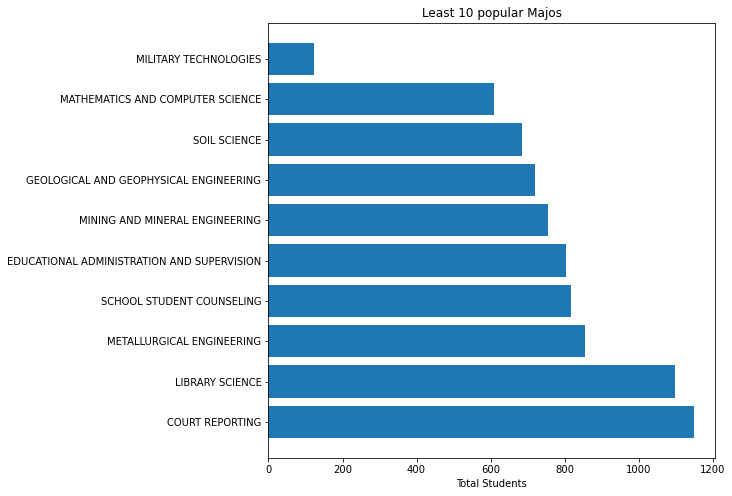

In [32]:
# ascending is set to true to get the least 10 popular majors
least_10_popular = recent_grads_df.sort_values(by="Total",axis=0,ascending=True)

fig, ax = plt.subplots(figsize=(8,8))

# barh to make a horizontal bar plot
ax.barh(least_10_popular["Major"][:10],least_10_popular["Total"][:10])
ax.set_yticks(least_10_popular["Major"][:10])
ax.set_yticklabels(least_10_popular["Major"][:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Students')
ax.set_title('Least 10 popular Majos')
plt.show()

### Hence, from the above plot we can conclude that Military Technologies is the least popular major out of all other majors and Court Reporting is at the bottom of top 10 least popular majors

# 15 Most Popular majors breakdown by gender

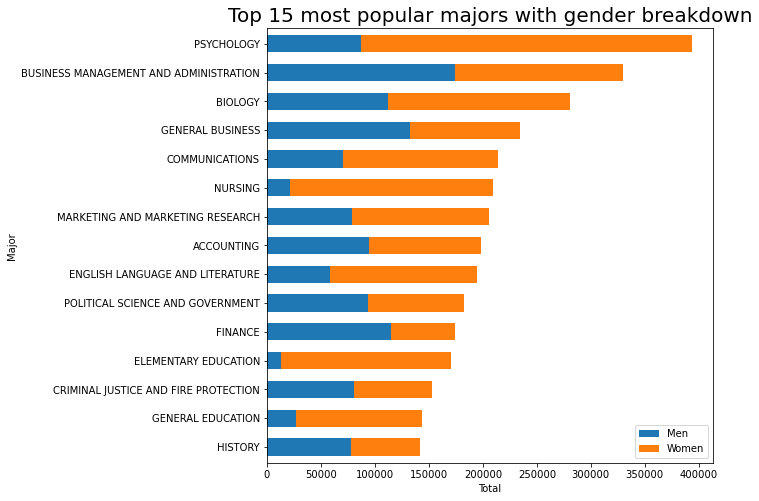

In [33]:
# head is set to 15 to get top 15 majors
graduates_major_grouping = recent_grads_df.groupby('Major').sum().sort_values('Total', ascending=False).head(15).reset_index()

major_gender_df = graduates_major_grouping.sort_values('Total')[['Major', 'Men', 'Women']]
major_gender_df.set_index('Major', inplace=True)
major_gender_df.plot(kind='barh', stacked=True, figsize=(8,8), width=0.6)

plt.xlabel('Total')
plt.title('Top 15 most popular majors with gender breakdown', fontdict={'fontsize': 20})
plt.show()

### From the above plot, we can see that:
* Psychology seems to be the most popular major which is highly skewed towards women
* Business Management & Administration and General Business are split evenly among both men and women
* Computer Science seems to be highly skewed towards men
* Nursing, Elementary Education and General Education are the most skewed towards Women out of all the majors

# Median salary variation in each Major category

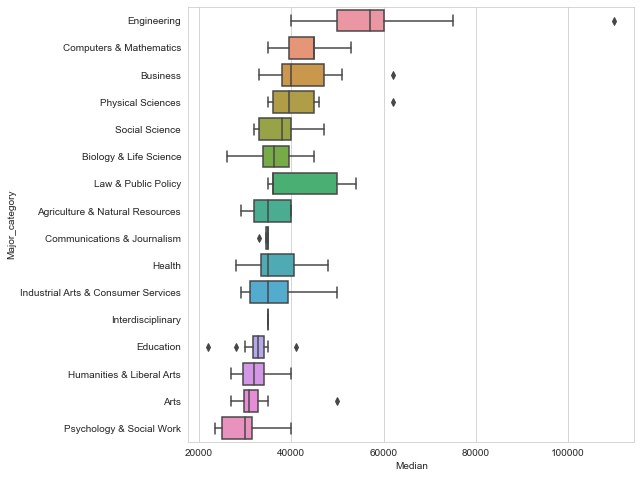

In [34]:
plt.figure(figsize=(8,8))
sns.set_style('whitegrid')

variation = recent_grads_df.loc[:, ['Major_category', 'Median']].groupby('Major_category').median() .sort_values(by='Median', ascending=False)

sns.boxplot(x='Median', y='Major_category', data=recent_grads_df, order=variation.index)
plt.show()

### From the above plot, we can see that:
1. **Out of all the major categories, STEM Majors along with Business majors are the highest paid majors.**
2. **Engineering is at the top of the list and the engineering graduates have a salary which varies between \\$40,000 and just below \\$78,000 with the median salary at just below \\$60,000**
3. **We can also see that most women prefer to go in the Engineering field as it is a less favorable major category by the Women**

# Methods

## 1. Clustering (DBSCAN)

In [35]:
from sklearn import preprocessing

grad_students_clone = grad_students_df.copy()
grad_students_clone["employment_rate"] = grad_students_clone["Grad_employed"]/(grad_students_clone["Grad_employed"]+grad_students_clone["Grad_unemployed"])

# Label encoding major category values
le = preprocessing.LabelEncoder()
grad_students_clone["Major_category_labelled"] = grad_students_clone[["Major_category"]].apply(le.fit_transform)

In [36]:
def print_labelled_categories(df):
    dict = {}
    for index, row in df.iterrows():
        if row["Major_category_labelled"] not in dict:
            dict[row["Major_category_labelled"]] = row["Major_category"]
    
    print("Mapping of Major_category\n")
    for key in sorted(dict):
        print("%s: %s" % (key, dict[key]))

print_labelled_categories(grad_students_clone)

Mapping of Major_category

0: Agriculture & Natural Resources
1: Arts
2: Biology & Life Science
3: Business
4: Communications & Journalism
5: Computers & Mathematics
6: Education
7: Engineering
8: Health
9: Humanities & Liberal Arts
10: Industrial Arts & Consumer Services
11: Interdisciplinary
12: Law & Public Policy
13: Physical Sciences
14: Psychology & Social Work
15: Social Science


In [37]:
from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler

# Compute DBSCAN
def dbscan(X, eps, min_samples):
    # X = StandardScaler().fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels))
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Estimated number of clusters: {}".format(n_clusters_))

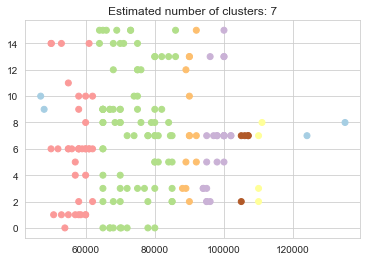

In [38]:
transformed_grad_1 = grad_students_clone[["Grad_median","Major_category_labelled"]].copy()
dbscan(transformed_grad_1.values, 2000, 4)

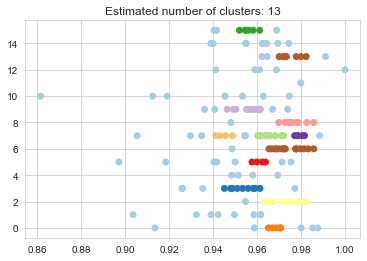

In [39]:
transformed_grad_2 = grad_students_clone[["employment_rate","Major_category_labelled"]].copy()
dbscan(transformed_grad_2.values, 0.005, 4)

### From the above two graphs, we can see that:
1. **Most of the majors are likely to pay graduate students between \\$60,000-\\$80,000 except category 1 and 6 (Arts, Education)**
2. **Employment rates are pretty high in category 6, but it is infeasible considering the median pay**
3. **From graph 2 we can decipher that even though certain majors fall under the same category, the employment opprtunities vary vastly (category 1,5,10)**
4. **Category 13 (Physical Sciences) seems to be the safest choice with good pay and employment opportunities. But if one is willing to aim for a high end salary, category 7 (Engineering) is a good choice as it pays better than every other category, but some majors have lower employment than others**

## 2. Random Forest Regression

<h4>Implemented a supervised learning algorithm to predict the number of low wage jobs on the basis of Major_category, Unemployment_rate, No of jobs that require a college degree and that don't require a college degree.
This method fits best as we have continues values, a small dataset,high variance within data and gives high accuracy that cannot be achieved by a single decision tree.</h4>

<AxesSubplot:xlabel='College_jobs', ylabel='Major_category'>

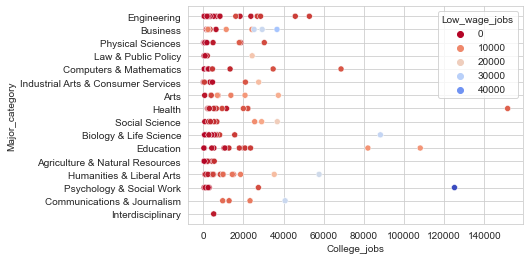

In [40]:
sns.scatterplot(data = recent_grads_df, x = "College_jobs", y = "Major_category", hue = recent_grads_df.Low_wage_jobs, palette = "coolwarm_r")

<h4>Above scatter plot plots values of jobs in a particular_major that do require a college degree but are still low paying. The variance is data is displayed</h4>

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [42]:
recent_grads_df=pd.read_csv("recent-grads.csv")
print(recent_grads_df.shape)
print(recent_grads_df.columns)

(173, 21)
Index(['Rank', 'Major_code', 'Major', 'Total', 'Men', 'Women',
       'Major_category', 'ShareWomen', 'Sample_size', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs'],
      dtype='object')


In [43]:
data_x=recent_grads_df[['Major_category',"Unemployment_rate",'College_jobs', 'Non_college_jobs','Low_wage_jobs']]

In [44]:
#Applying one hot encoding on major category
onenc=OneHotEncoder()
x_enc=onenc.fit_transform(data_x.iloc[:,0:1]).toarray()
x_enc =pd.DataFrame(x_enc)


<h4>As the data displays high variance, RobustScaler method would be ideal for feature scaling the data as it considers percentiles of 25th and 75th quartiles.</h4>

In [45]:
#Using RobustScaler method for scaling high variance data
from sklearn.preprocessing import RobustScaler
RS=RobustScaler(with_centering=True, with_scaling=True)
x_scaled=RS.fit_transform(data_x.iloc[:,1:])
x_scaled=pd.DataFrame(x_scaled)

In [46]:
df2=pd.concat([x_enc,x_scaled],axis=1)

In [47]:
x=df2.iloc[:,:-1]
y=df2.iloc[:,[-1]]

In [48]:
#Splitting dataset in training dataset and testing dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.9,random_state=42)
print(xtrain.shape)
print(ytrain.shape)
print(xtrain.head())

(155, 19)
(155, 1)
      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
24   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
153  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
93   0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
45   0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
146  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      14   15        0         1         2   
24   0.0  0.0 -0.260966  0.152870  0.112441  
153  0.0  0.0  0.919088 -0.042368  0.298273  
93   0.0  0.0  0.193720  2.848539  9.161009  
45   0.0  0.0 -0.193804  0.000000 -0.048371  
146  0.0  0.0  0.214732  0.733182  2.373528  


In [49]:
#Creating a Random Forest Regression model and fitting it to the training data
forest=RandomForestRegressor(n_estimators=1400,random_state=42)
forest.fit(xtrain,ytrain)

#Predicting values for test data
ypred=forest.predict(xtest)
testdf=pd.DataFrame()
print("Model training executed successfully")

/var/folders/fr/0xypwjmj4zx83hqz91x7fc_c0000gn/T/ipykernel_32989/2933021400.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(xtrain,ytrain)


Model training executed successfully


In [50]:
print(ytest)
print(ypred)

            3
162  1.802623
42   0.141075
90  -0.323097
60  -0.035189
114  4.992962
137  8.084453
41   1.067818
15  -0.226168
113  3.266795
108 -0.105246
124  4.004159
82   0.569738
78   5.941139
38  -0.240243
31  -0.348369
9    0.620282
111 -0.289187
56   0.405630
[ 0.98516475  0.71463075 -0.33349054  0.05911548  4.21900443  7.73337743
  0.93511653 -0.25634974  3.0410648  -0.20328512  3.26585321  0.5377365
  7.33143108 -0.25685792 -0.28739101  0.64218513 -0.22665638  0.42447125]


<h4>As seen above, Output of the test model is 0.42 when expected was 0.40, -0.22 when expected was -0.28. The model predicts successfully with tolerable margins of error.
</h4>

In [51]:
#For calcuating accuracy of the model

test_labels=ytest.iloc[0:18,0:1].values
errors = abs(ypred - test_labels)

#Calculating mean absolute percentage error
mape=100*(errors/test_labels)

print(np.median(mape))

52.82117717700892


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Calculate and display accuracy
accuracy=100-np.median(mape)
print(accuracy)
print('Accuracy:', round(accuracy, 2), '%.')

47.17882282299108
Accuracy: 47.18 %.


['Engineering' 'Business' 'Physical Sciences' 'Law & Public Policy'
 'Computers & Mathematics' 'Agriculture & Natural Resources'
 'Industrial Arts & Consumer Services' 'Arts' 'Health' 'Social Science'
 'Biology & Life Science' 'Education' 'Humanities & Liberal Arts'
 'Psychology & Social Work' 'Communications & Journalism'
 'Interdisciplinary' 'Unemployment_rate' 'College_jobs' 'Non_college_jobs']


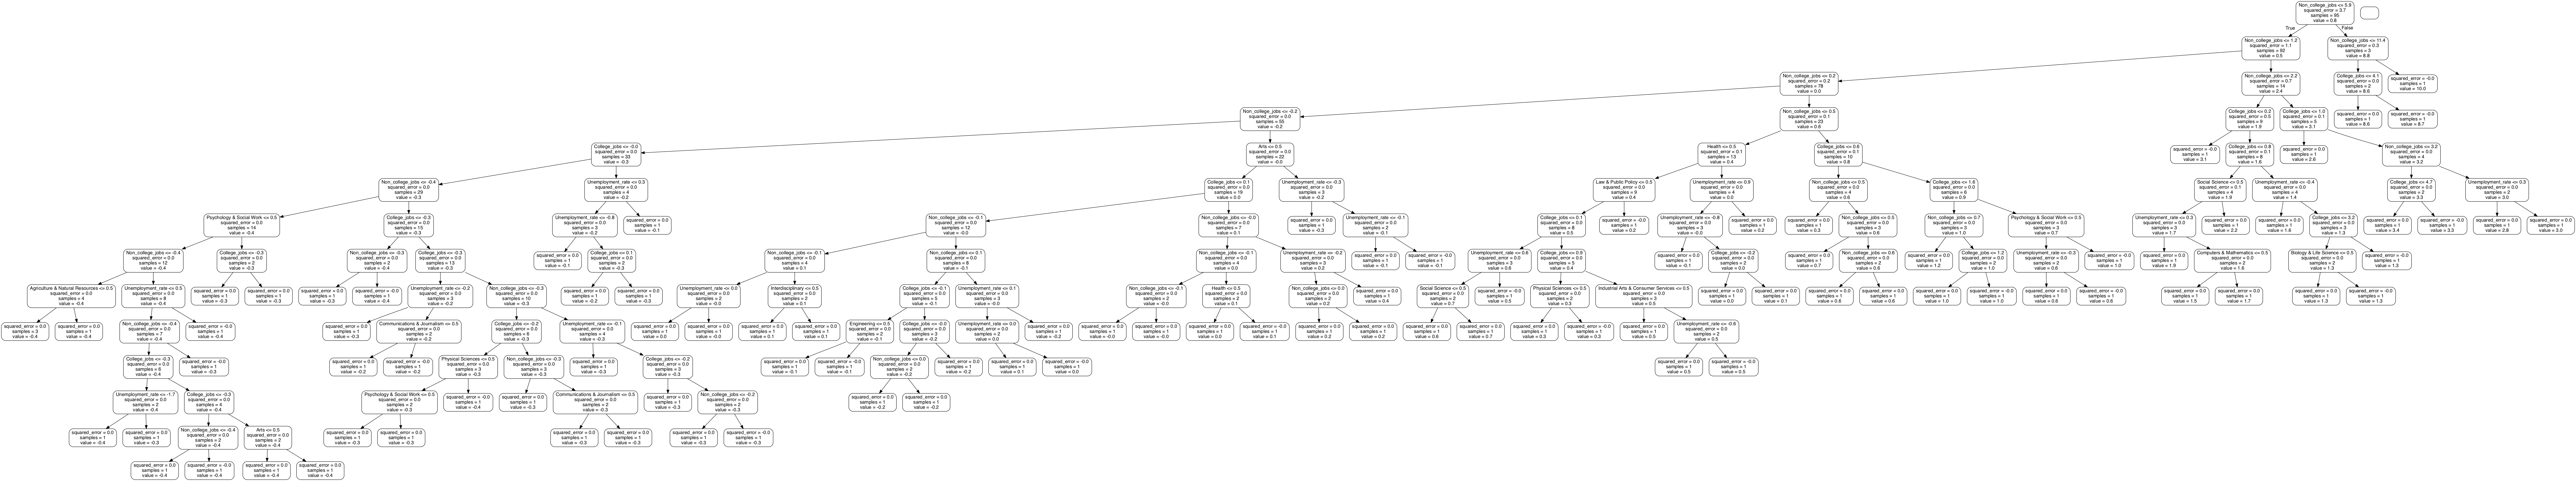

In [53]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

# Pull out one tree from the forest
tree = forest.estimators_[5]

# Export the image to a dot file
feature_list=data_x['Major_category'].unique()
cols_list=data_x.iloc[:,1:4].columns.values
feature_list=np.concatenate((feature_list, cols_list), axis=None)
print(feature_list)

export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')
display(Image(graph.create_png()))

<h4>As the decision tree above is huge and difficult to interpret, we will implement a small decision tree with specified depth. <h4>

/var/folders/fr/0xypwjmj4zx83hqz91x7fc_c0000gn/T/ipykernel_32989/2381367268.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_small.fit(xtrain,ytrain)


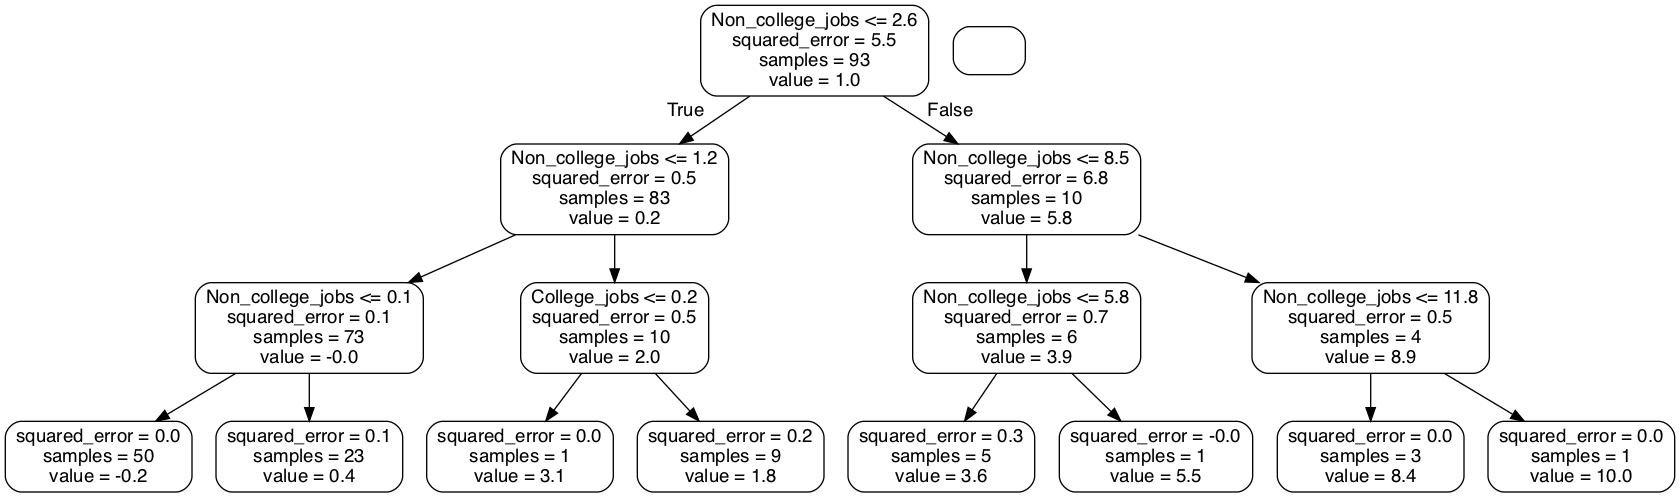

In [54]:
# Limit depth of tree to 3 levels
forest_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
forest_small.fit(xtrain,ytrain)

tree_small = forest_small.estimators_[5]

# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
display(Image(graph.create_png()))

In [55]:
%matplotlib inline

from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
from time import time
from matplotlib.ticker import NullFormatter
import umap.umap_ as umap
from functools import reduce

plt.style.use('ggplot')
#To suppress unnecesary future warings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [56]:
df_all_ages_cpy = all_ages_df.copy()
df_grad_students_cpy = grad_students_df.copy()
df_women_stem_cpy = women_stem_df.copy()
df_recent_grads_cpy = recent_grads_df.copy()



df_women_stem_cpy=df_women_stem_cpy.rename(columns={"Median":"W-stem_Median","Total":"W-stem_Total","Men": "W-stem_Men",
                        "Women": "W-stem_Women"})
df_recent_grads_cpy=df_recent_grads_cpy.rename(columns={"Total":"Rec_grad_Total","Men": "Rec_grad_Men", "Women": "Rec_grad_Women",
                   "ShareWomen":"Rec_grad_ShareWomen","Employed":"Rec_grad_Employed",
                   "Unemployed":"Rec_grad_Unemployed","Unemployment_rate":"Rec_grad_Unemployment_rate",
                  "Median":"Rec_grad_Median","P25th":"Rec_grad_P25th","P75th":"Rec_grad_P75th"})


dfs=[df_all_ages_cpy,df_grad_students_cpy,df_women_stem_cpy,df_recent_grads_cpy]
df= reduce(lambda left,right: pd.merge(left,right,on=['Major_code','Major','Major_category']), dfs)


df=pd.get_dummies(df,columns=['Major','Major_category','Major_code'])
df.fillna(value=0, inplace=True)
X = df.values #feature matrix

In [57]:
df.shape
df.head()

,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,Grad_total,Grad_sample_size,...,Major_code_6102,Major_code_6103,Major_code_6104,Major_code_6105,Major_code_6106,Major_code_6107,Major_code_6108,Major_code_6109,Major_code_6110,Major_code_6199
0,106106,87602,65238,4736,0.051290,52000,38000,75000.0,43612,925,...,0,0,0,0,0,0,0,0,0,0
1,294692,216770,163020,20394,0.085991,63000,40400,93500.0,148255,2760,...,0,0,0,0,0,0,0,0,0,0
2,62141,49609,37261,4609,0.085009,50000,34500,75000.0,9109,171,...,0,0,0,0,0,0,0,0,0,0
3,253782,218248,189950,11945,0.051891,65000,45000,90000.0,71527,1425,...,0,0,0,0,0,0,0,0,0,0
4,29317,22828,18747,2265,0.090264,60000,40000,85000.0,5611,98,...,0,0,0,0,0,0,0,0,0,0


## 3. Dimensionality Reduction (PCA)
<h4>Applied dimensionality reduction to understand the variation that different attributes bring aabout in the data using Principal Component Ananlysis, this allows us to reduce the dimenionality of the data by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.</h4>

In [58]:
#create the object
scaler =  StandardScaler()


#transform the values
X_scaled = scaler.fit_transform(X)

In [59]:
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

76


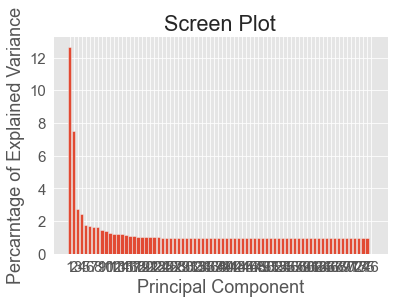

In [60]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]
l1=[str(x) for x in range(1,len(per_var)+1)]

print(len(per_var))

plt.rcParams.update({'font.size': 15})

plt.bar(x=range(1,len(per_var)+1), height=per_var,tick_label=l1)
plt.ylabel("Percarntage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Screen Plot")
plt.rcParams["figure.figsize"] = (24,20)
plt.show()

<h4>The above graph shows that the most variations in the data can occur due to the first two components.</h4>

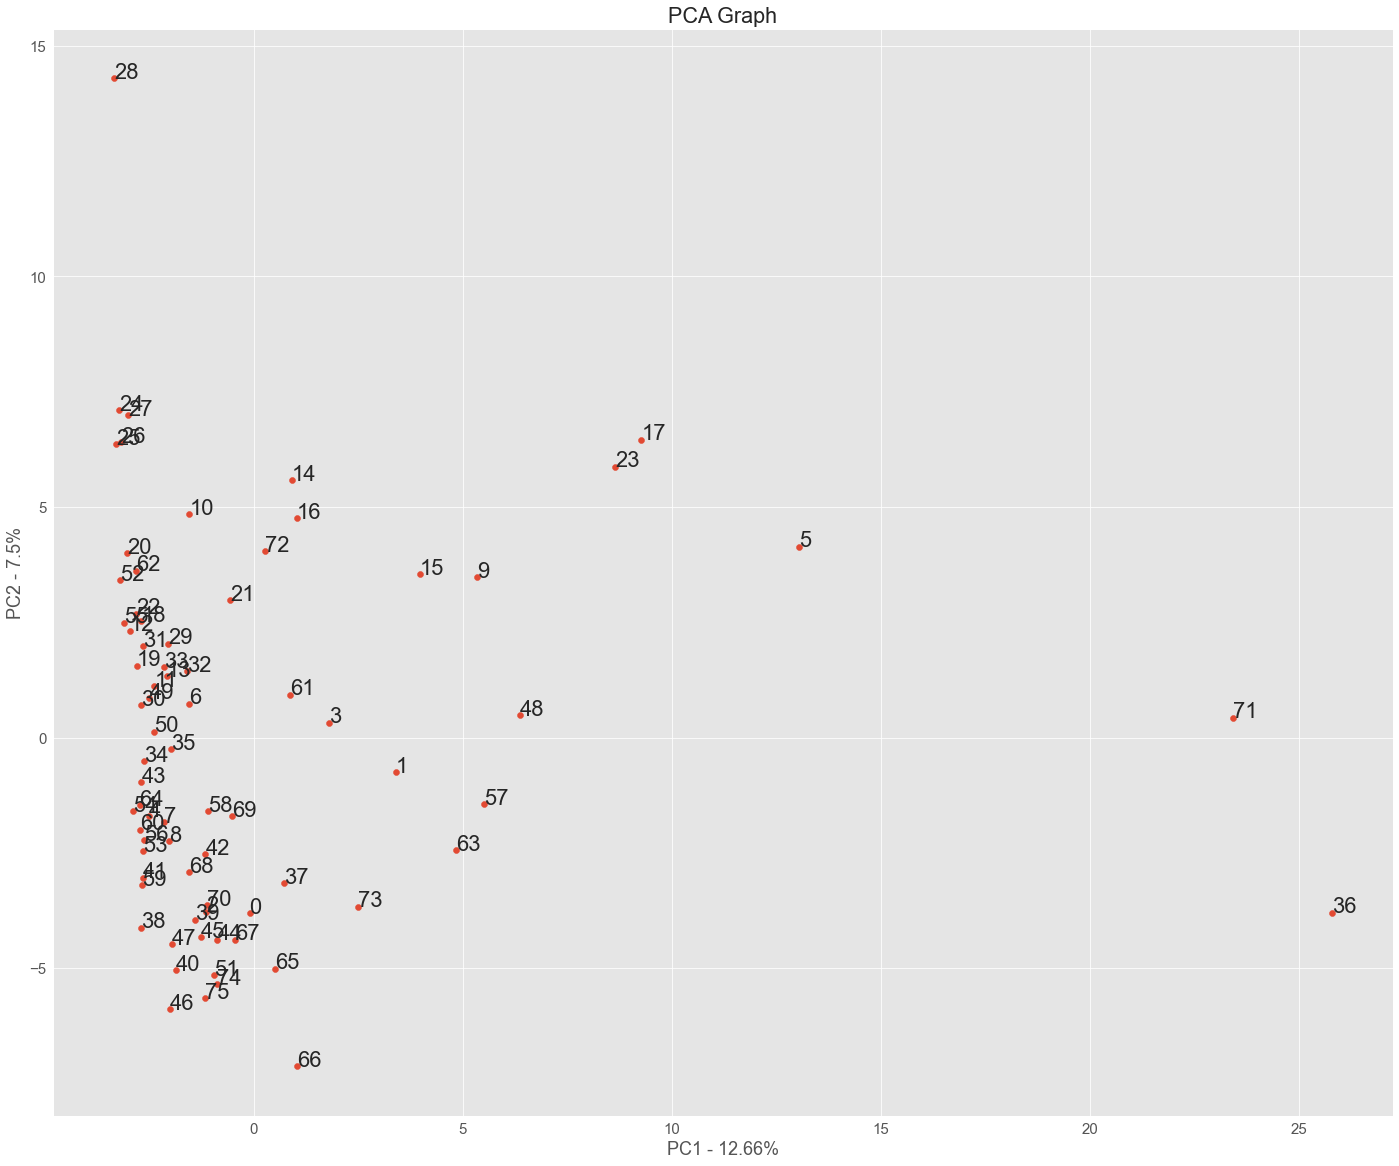

In [61]:
pca_df=pd.DataFrame(X_pca,columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
plt.rcParams.update({'font.size': 22})

for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))

plt.show()

In [62]:
loading_scores=pd.Series(pca.components_[0])

sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)

top_10 = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10])

39    0.193767
40    0.193459
28    0.192791
34    0.192791
42    0.191995
43    0.187888
3     0.185704
48    0.185455
10    0.183617
11    0.183488
dtype: float64


In [63]:
loading_scores=pd.Series(pca.components_[0])

sorted_loading_scores= loading_scores.abs().sort_values(ascending=False)

top_10 = sorted_loading_scores[0:10].index.values

print(loading_scores[top_10])

39    0.193767
40    0.193459
28    0.192791
34    0.192791
42    0.191995
43    0.187888
3     0.185704
48    0.185455
10    0.183617
11    0.183488
dtype: float64


In [64]:
print('Variance for Principal Components = ', np.cumsum(pca.explained_variance_ratio_ * 100)[69])

Variance for Principal Components =  95.12820512820521
